In [572]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
import random

# Building the directories for storing output images and plot
Mandatorily execute the following mentioned cell to generate required directories, such that complete notebook is executed without any errors and all the results are stored in appropriate folders.

In [573]:
for i in range(5):
    os.makedirs('../outputs/ans' + str(i+1), exist_ok=True)

## Labels: 
### 1 -> Neutral
### 0 -> Smile

In [574]:
images = []
labels = []
for file in os.listdir("../data/trainset"):
    image = mpimg.imread("../data/trainset/" + file)
    image = image.flatten()
    images.append(image)
    if file.endswith("a.jpg"):
        labels.append(1)
    else:
        labels.append(0)

images = np.array(images)
labels = np.array(labels)

image_shape = (193, 162)
print("Number of images: ", len(images))
print("Image shape: ", image_shape)

Number of images:  342
Image shape:  (193, 162)


In [575]:
trainset_size = 100

sampling = np.random.choice(int(images.shape[0] / 2), int(images.shape[0] / 2), replace=False)
sampling_train = sampling[:trainset_size]
sampling_test = sampling[trainset_size:]

train_neutral = images[2 * sampling_train]
train_smile = images[2 * sampling_train + 1]

test_neutral = images[2 * sampling_test]
test_smile = images[2 * sampling_test + 1]

temp = np.concatenate((images[2 * sampling_test], images[2 * sampling_test + 1]), axis=0)
labels_temp = np.concatenate((labels[2 * sampling_test], labels[2 * sampling_test + 1]), axis=0)

In [576]:
testset_size = 60
classify_sample = np.random.choice(int(images.shape[0]) - (2 * trainset_size), testset_size, replace=False)

classify_set = temp[classify_sample]
label_truth = labels_temp[classify_sample]

# Training

In [577]:
mean_image_neutral = np.mean(train_neutral, axis=0)
mean_image_smile = np.mean(train_smile, axis=0)

# Difference from mean image
diff_neutral = train_neutral - mean_image_neutral
diff_smile = train_smile - mean_image_smile

Since calculating standard covariance for generating eigenfaces is computaionally expensive; we will generate a low dimensional matrix, for generation of eigenfaces

In [578]:
cov_neutral = diff_neutral @ diff_neutral.T
cov_smile = diff_smile @ diff_smile.T

In [579]:
eigenvalues_neutral, eigenvectors_neutral = np.linalg.eig(cov_neutral)
eigenvalues_smile, eigenvectors_smile = np.linalg.eig(cov_smile)

Above Eigenvalues and corresponding Eigenvectors are sorted from largest to smallest

Eigenface ($\mathbf{u}_l$) is given by
$$
\mathbf{u}_l \ = \ \Sigma^{i}_{M} \ \mathbf{v}_{l,i} \delta_i
$$

where, $\mathbf{v}_{l,i}$ is the $l^{\text{th}}$ eigenvector ($i$ is index of term in the vector); and $\delta_{i}$ represents difference image of $i$ sampled image

Below is eigenface (neutral) corresponding to max eigenvalue eigenvector. These eigenfaces are the principal components of the image space.

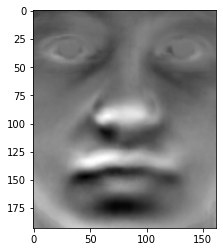

In [580]:
eigenface_neutral_eg = diff_neutral.T @ eigenvectors_neutral[:, 0]
plt.imshow(eigenface_neutral_eg.reshape(image_shape), cmap="gray")

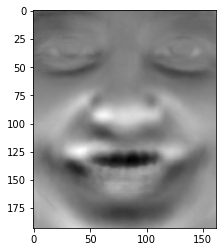

In [581]:
eigenface_smile_eg = diff_smile.T @ eigenvectors_smile[:, 0]
plt.imshow(eigenface_smile_eg.reshape(image_shape), cmap="gray")

## Problem 1
Save 10 most representative eigenfaces; higher the eigenvalue of eigenvector used to generate eigenface, more representative will be eigenface.

### Neutral

In [582]:
for i in range(10):
    eigenface_neutral_display = diff_neutral.T @ eigenvectors_neutral[:, i]
    eigenface_neutral_display = eigenface_neutral_display.reshape(image_shape)
    plt.imshow(eigenface_neutral_display, cmap="gray")
    plt.savefig("../outputs/ans1/neutral_eigenface_" + str(i) + ".png")
    plt.close()

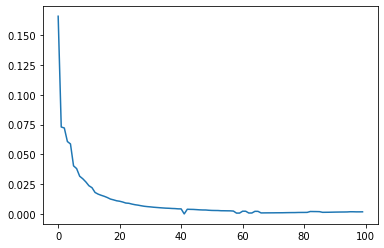

In [583]:
normalised_eigenvalues = eigenvalues_neutral / sum(eigenvalues_neutral)
plt.plot(normalised_eigenvalues)

In [584]:
PCs_neutral = diff_neutral.T @ eigenvectors_neutral[:, :25]
PCs_neutral = PCs_neutral / np.linalg.norm(PCs_neutral, axis=0)

* Plot shown above represents normalised eigenvalues. From this plot, we can infer that we get relevant features only from eigenfaces (Principal Components) generated from eigenvectors corresponding to largest 25 eigenvalues. As the effective weights of other eigenvectors is almost negligible i.e. they could not improve the representation by an appreciable factor. Hence, we chose 25 principal components.
* Plot shown below represents singular values of the data matrix. Singular values ($\sigma_i$) can be represented in terms of eigenvalues ($\lambda_i$) as $\sigma_i \ = \ \sqrt{\lambda_i}$. Hence, this plot can also be used to give above inference and choose appropriate number of principal components.

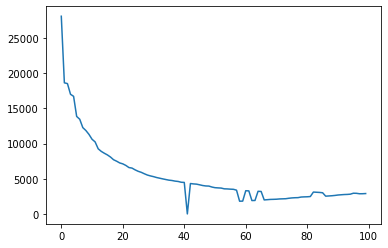

In [585]:
plt.plot(np.sqrt(eigenvalues_neutral))
plt.savefig("../outputs/ans1/neutral_singular_values.png")
plt.show()
plt.close()

### Smile

In [586]:
for i in range(10):
    eigenface_smile_display = diff_smile.T @ eigenvectors_smile[:, i]
    eigenface_smile_display = eigenface_smile_display.reshape(image_shape)
    plt.imshow(eigenface_smile_display, cmap="gray")
    plt.savefig("../outputs/ans1/smile_eigenface_" + str(i) + ".png")
    plt.close()

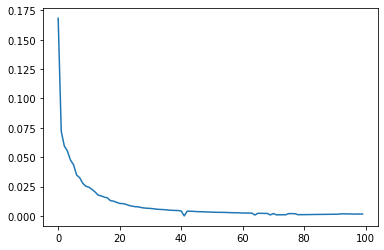

In [587]:
normalised_eigenvalues = eigenvalues_smile / sum(eigenvalues_smile)
plt.plot(normalised_eigenvalues)

* Plot shown above represents normalised eigenvalues. From this plot, we can infer that we get relevant features only from eigenfaces (Principal Components) generated from eigenvectors corresponding to largest 25 eigenvalues. As the effective weights of other eigenvectors is almost negligible i.e. they could not improve the representation by an appreciable factor. Hence, we chose 25 principal components.
* Plot shown below represents singular values of the data matrix. Singular values ($\sigma_i$) can be represented in terms of eigenvalues ($\lambda_i$) as $\sigma_i \ = \ \sqrt{\lambda_i}$. Hence, this plot can also be used to give above inference and choose appropriate number of principal components.

In [588]:
PCs_smile = diff_smile.T @ eigenvectors_smile[:, :25]
PCs_smile = PCs_smile / np.linalg.norm(PCs_smile, axis=0)

C:\Users\awies\AppData\Local\Temp\ipykernel_33192\3664706454.py:1: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(np.sqrt(eigenvalues_smile))


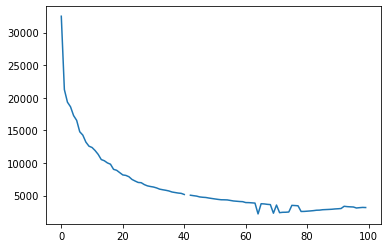

In [589]:
plt.plot(np.sqrt(eigenvalues_smile))
plt.savefig("../outputs/ans1/smile_singular_values.png")
plt.show()
plt.close()

## Problem 2

In [590]:
reconstruction_id_neutral = random.randint(0, trainset_size - 1)
original_neutral = train_neutral[reconstruction_id_neutral]

for i in range(6):
    if i == 0:
        continue
    eigenface_neutral = diff_neutral.T @ eigenvectors_neutral[:, :5 * (i)]
    eigenface_neutral = eigenface_neutral / np.linalg.norm(eigenface_neutral, axis=0)
    reconstruction = mean_image_neutral + ((diff_neutral[reconstruction_id_neutral] @ eigenface_neutral) @ eigenface_neutral.T)
    plt.subplot(1, 2, 1, title = "Original")
    plt.imshow(original_neutral.reshape(image_shape), cmap="gray")
    plt.subplot(1, 2, 2, title = "Reconstruction")
    plt.imshow(reconstruction.reshape(image_shape), cmap="gray")
    plt.savefig("../outputs/ans2/PCs_" + str(5 * i) + ".png")
    plt.close()

for i in range(6):
    if i == 0:
        continue
    eigenface_neutral = diff_neutral.T @ eigenvectors_neutral[:, :(25 + (15 * (i)))]
    eigenface_neutral = eigenface_neutral / np.linalg.norm(eigenface_neutral, axis=0)
    reconstruction = mean_image_neutral + ((diff_neutral[reconstruction_id_neutral] @ eigenface_neutral) @ eigenface_neutral.T)
    plt.subplot(1, 2, 1, title = "Original")
    plt.imshow(original_neutral.reshape(image_shape), cmap="gray")
    plt.subplot(1, 2, 2, title = "Reconstruction")
    plt.imshow(reconstruction.reshape(image_shape), cmap="gray")
    plt.savefig("../outputs/ans2/PCs_" + str(25 + (15 * i)) + ".png")
    plt.close()

MSE_neutral = []
for i in range(1, 101):
    eigenface_neutral = diff_neutral.T @ eigenvectors_neutral[:, :i]
    eigenface_neutral = eigenface_neutral / np.linalg.norm(eigenface_neutral, axis=0)
    reconstruction = mean_image_neutral + ((diff_neutral[reconstruction_id_neutral] @ eigenface_neutral) @ eigenface_neutral.T)
    MSE_neutral.append(np.mean((original_neutral - reconstruction) ** 2))

MSE_neutral = np.array(MSE_neutral)

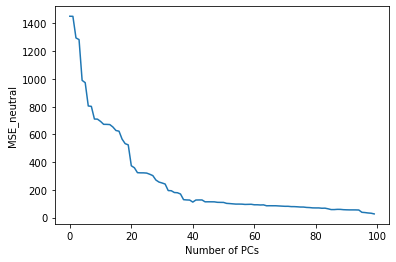

In [591]:
plt.plot(MSE_neutral)
plt.xlabel("Number of PCs")
plt.ylabel("MSE_neutral")
plt.savefig("../outputs/ans2/MSE_neutral.png")
plt.show()
plt.close()

* As we can see from the plot, initially MSE decreases drastically when we increase the number of PCs. After a certain number of PCs, the decrease in MSE is not so steep eventhough we increase the number of PCs. This is due to similar reason mentioned in the previous part. 
* The Principal Components, after about 25 most representative eigenfaces, does not provide substantial additional information to improve the reconstructed image drastically. This was also inferred by analysing corresponding eigenvalues in problem 1. 
* We also see that there is no visible difference between image reconstructed using 100 PCs and original image. The MSE between these images is also almost 0. This is as expected since, this image in present in our training set. So, we can say that we have found fairly consistent basis for the image space.

## Problem 3

In [592]:
reconstruction_id_smile = random.randint(0, trainset_size - 1)
original_smile = train_smile[reconstruction_id_smile]

for i in range(6):
    if i == 0:
        continue
    eigenface_smile = diff_smile.T @ eigenvectors_smile[:, :5 * (i)]
    eigenface_smile = eigenface_smile / np.linalg.norm(eigenface_smile, axis=0)
    reconstruction = mean_image_smile + ((diff_smile[reconstruction_id_smile] @ eigenface_smile) @ eigenface_smile.T)
    plt.subplot(1, 2, 1, title = "Original")
    plt.imshow(original_smile.reshape(image_shape), cmap="gray")
    plt.subplot(1, 2, 2, title = "Reconstruction")
    plt.imshow(reconstruction.reshape(image_shape), cmap="gray")
    plt.savefig("../outputs/ans3/PCs_" + str(5 * i) + ".png")
    plt.close()

for i in range(6):
    if i == 0:
        continue
    eigenface_smile = diff_smile.T @ eigenvectors_smile[:, :(25 + (15 * (i)))]
    eigenface_smile = eigenface_smile / np.linalg.norm(eigenface_smile, axis=0)
    reconstruction = mean_image_smile + ((diff_smile[reconstruction_id_smile] @ eigenface_smile) @ eigenface_smile.T)
    plt.subplot(1, 2, 1, title = "Original")
    plt.imshow(original_smile.reshape(image_shape), cmap="gray")
    plt.subplot(1, 2, 2, title = "Reconstruction")
    plt.imshow(reconstruction.reshape(image_shape), cmap="gray")
    plt.savefig("../outputs/ans3/PCs_" + str(25 + (15 * i)) + ".png")
    plt.close()

MSE_smile = []
for i in range(1, 101):
    eigenface_smile = diff_smile.T @ eigenvectors_smile[:, :i]
    eigenface_smile = eigenface_smile / np.linalg.norm(eigenface_smile, axis=0)
    reconstruction = mean_image_smile + ((diff_smile[reconstruction_id_smile] @ eigenface_smile) @ eigenface_smile.T)
    MSE_smile.append(np.mean((original_smile - reconstruction) ** 2))

MSE_smile = np.array(MSE_smile)

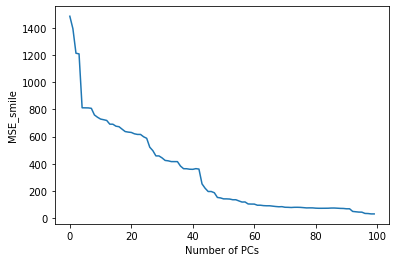

In [593]:
plt.plot(MSE_smile)
plt.xlabel("Number of PCs")
plt.ylabel("MSE_smile")
plt.savefig("../outputs/ans3/MSE_smile.png")
plt.show()
plt.close()

* As we can see from the plot, initially MSE decreases drastically when we increase the number of PCs. After a certain number of PCs, the decrease in MSE is not so steep eventhough we increase the number of PCs. This is due to similar reason mentioned in the previous part. 
* The Principal Components, after about 25 most representative eigenfaces, does not provide substantial additional information to improve the reconstructed image drastically. This was also inferred by analysing corresponding eigenvalues in problem 1. 
* We also see that there is no visible difference between image reconstructed using 100 PCs and original image. The MSE between these images is also almost 0. This is as expected since, this image in present in our training set. So, we can say that we have found fairly consistent basis for the image space.

## Problem 4
### Neutral

In [594]:
test_reconstruction_id_neutral = random.randint(0, (int(images.shape[0] / 2) - trainset_size) - 1)
test_original_neutral = test_neutral[test_reconstruction_id_neutral]

for i in range(6):
    if i == 0:
        continue
    diff = test_neutral[test_reconstruction_id_neutral] - mean_image_neutral
    eigenface_neutral = diff_neutral.T @ eigenvectors_neutral[:, :5 * (i)]
    eigenface_neutral = eigenface_neutral / np.linalg.norm(eigenface_neutral, axis=0)
    reconstruction = mean_image_neutral + ((diff @ eigenface_neutral) @ eigenface_neutral.T)
    plt.subplot(1, 2, 1, title = "Original")
    plt.imshow(test_original_neutral.reshape(image_shape), cmap="gray")
    plt.subplot(1, 2, 2, title = "Reconstruction")
    plt.imshow(reconstruction.reshape(image_shape), cmap="gray")
    plt.savefig("../outputs/ans4/PCs_neutral_" + str(5 * i) + ".png")
    plt.close()

for i in range(6):
    if i == 0:
        continue
    diff = test_neutral[test_reconstruction_id_neutral] - mean_image_neutral
    eigenface_neutral = diff_neutral.T @ eigenvectors_neutral[:, :(25 + (15 * (i)))]
    eigenface_neutral = eigenface_neutral / np.linalg.norm(eigenface_neutral, axis=0)
    reconstruction = mean_image_neutral + ((diff @ eigenface_neutral) @ eigenface_neutral.T)
    plt.subplot(1, 2, 1, title = "Original")
    plt.imshow(test_original_neutral.reshape(image_shape), cmap="gray")
    plt.subplot(1, 2, 2, title = "Reconstruction")
    plt.imshow(reconstruction.reshape(image_shape), cmap="gray")
    plt.savefig("../outputs/ans4/PCs_neutral_" + str(25 + (15 * i)) + ".png")
    plt.close()

MSE_test_neutral = []
for i in range(1, 101):
    diff = test_neutral[test_reconstruction_id_neutral] - mean_image_neutral
    eigenface_neutral = diff_neutral.T @ eigenvectors_neutral[:, :i]
    eigenface_neutral = eigenface_neutral / np.linalg.norm(eigenface_neutral, axis=0)
    reconstruction = mean_image_neutral + ((diff @ eigenface_neutral) @ eigenface_neutral.T)
    MSE_test_neutral.append(np.mean((test_original_neutral - reconstruction) ** 2))

MSE_test_neutral = np.array(MSE_test_neutral)

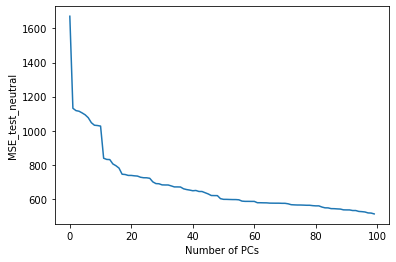

In [595]:
plt.plot(MSE_test_neutral)
plt.xlabel("Number of PCs")
plt.ylabel("MSE_test_neutral")
plt.savefig("../outputs/ans4/MSE_test_neutral.png")
plt.show()
plt.close()

* Since we are randomly sampling to generate the test and train set, we observe that MSE would not always be the same. After testing several times we see that variance in MSE is about 200 units. We can infer from above plot that behaviour of the algorithm does not change for the test set i.e. MSE decreases as we increase the number of Principal Components.
* Contrary to MSE from trainset image (minimum MSE = 0), we see that even after using all possible principal components (100), we still couldn't get MSE of testset image down to 0. Least MSE obtained was about 100 units. Since, MSE on testset image is never too low it is safe to say that we did not overfit the model, and the obtained model could be used for more general datapoints.
* On reconstructing the image, we see that the image is not as sharp as original image. We also observe that, the model atleast captured the key features appropriately, for example: contours of features of face (eyes, mouth, eyebrows). We can also see that there is vast difference in the shades of grayscale between the images.
* The image generated by our model is visually (perceived by us) the image of same face as the groundtruth face. In some cases, it visually (perceived by us) seems that we get better reconstructed image using lower PCs (Eg: 40) instead of 100 which is contrary to plotted MSE (since MSE decreases with increase in PCs).

### Smile

In [596]:
test_reconstruction_id_smile = random.randint(0, (int(images.shape[0] / 2) - trainset_size) - 1)
test_original_smile = test_smile[test_reconstruction_id_smile]

for i in range(6):
    if i == 0:
        continue
    diff = test_smile[test_reconstruction_id_smile] - mean_image_smile
    eigenface_smile = diff_smile.T @ eigenvectors_smile[:, :5 * (i)]
    eigenface_smile = eigenface_smile / np.linalg.norm(eigenface_smile, axis=0)
    reconstruction = mean_image_smile + ((diff @ eigenface_smile) @ eigenface_smile.T)
    plt.subplot(1, 2, 1, title = "Original")
    plt.imshow(test_original_smile.reshape(image_shape), cmap="gray")
    plt.subplot(1, 2, 2, title = "Reconstruction")
    plt.imshow(reconstruction.reshape(image_shape), cmap="gray")
    plt.savefig("../outputs/ans4/PCs_smile_" + str(5 * i) + ".png")
    plt.close()

for i in range(6):
    if i == 0:
        continue
    diff = test_smile[test_reconstruction_id_smile] - mean_image_smile
    eigenface_smile = diff_smile.T @ eigenvectors_smile[:, :(25 + (15 * (i)))]
    eigenface_smile = eigenface_smile / np.linalg.norm(eigenface_smile, axis=0)
    reconstruction = mean_image_smile + ((diff @ eigenface_smile) @ eigenface_smile.T)
    plt.subplot(1, 2, 1, title = "Original")
    plt.imshow(test_original_smile.reshape(image_shape), cmap="gray")
    plt.subplot(1, 2, 2, title = "Reconstruction")
    plt.imshow(reconstruction.reshape(image_shape), cmap="gray")
    plt.savefig("../outputs/ans4/PCs_smile_" + str(25 + (15 * i)) + ".png")
    plt.close()

MSE_test_smile = []
for i in range(1, 101):
    diff = test_smile[test_reconstruction_id_smile] - mean_image_smile
    eigenface_smile = diff_smile.T @ eigenvectors_smile[:, :i]
    eigenface_smile = eigenface_smile / np.linalg.norm(eigenface_smile, axis=0)
    reconstruction = mean_image_smile + ((diff @ eigenface_smile) @ eigenface_smile.T)
    MSE_test_smile.append(np.mean((test_original_smile - reconstruction) ** 2))

MSE_test_smile = np.array(MSE_test_smile)

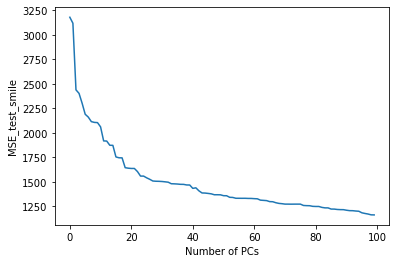

In [597]:
plt.plot(MSE_test_smile)
plt.xlabel("Number of PCs")
plt.ylabel("MSE_test_smile")
plt.savefig("../outputs/ans4/MSE_test_smile.png")
plt.show()
plt.close()

* Since we are randomly sampling to generate the test and train set, we observe that MSE would not always be the same. After testing several times we see that variance in MSE is about 200 units. We can infer from above plot that behaviour of the algorithm does not change for the test set i.e. MSE decreases as we increase the number of Principal Components.
* Contrary to MSE from trainset image (minimum MSE = 0), we see that even after using all possible principal components (100), we still couldn't get MSE of testset image down to 0. Least MSE obtained was about 100 units. Since, MSE on testset image is never too low it is safe to say that we did not overfit the model, and the obtained model could be used for more general datapoints.
* On reconstructing the image, we see that the image is not as sharp as original image. We also observe that, the model atleast captured the key features appropriately, for example: contours of features of face (eyes, mouth, smile, eyebrows). We can also see that there is vast difference in the shades of grayscale between the images.
* The image generated by our model is visually (perceived by us) the image of same face as the groundtruth face. In some cases, it visually (perceived by us) seems that we get better reconstructed image using lower PCs (Eg: 40) instead of 100 which is contrary to plotted MSE (since MSE decreases with increase in PCs).

## Problem 5 - Classification
Testset is generated at the beginning of the notebook with variable name as `classify_set`. The images (`image`) in this are flattened using `image.flatten()` i.e. images are flattened in row-major order. The variable `label_truth` represents the groundtruth of images present in testset. The predicted labels are stored in `label_pred` mentioned in following cell.

In [598]:
mislabel_image_set = []
mislabel_rec_neutral_set = []
mislabel_rec_smile_set = []
mislabel = []

accuracy = 0
accuracy_neutral = 0
accuracy_smile = 0

neutral_size = 0
smile_size = 0

label_pred = []

for i in range(label_truth.shape[0]):
    if label_truth[i] == 1:
        neutral_size += 1
    else:
        smile_size += 1

for i in range(classify_set.shape[0]):
    label = 0
    diff_neutral_test = classify_set[i] - mean_image_neutral
    diff_smile_test = classify_set[i] - mean_image_smile
    reconstruction_neutral = mean_image_neutral + ((diff_neutral_test @ PCs_neutral) @ PCs_neutral.T)
    reconstruction_smile = mean_image_smile + ((diff_smile_test @ PCs_smile) @ PCs_smile.T)
    MSE_neutral = np.mean((classify_set[i] - reconstruction_neutral) ** 2)
    MSE_smile = np.mean((classify_set[i] - reconstruction_smile) ** 2)
    if MSE_neutral < MSE_smile:
        label = 1
        label_pred.append(1)
    else:
        label = 0
        label_pred.append(0)
    
    if label == label_truth[i]:
        accuracy += 1
        if label == 1:
            accuracy_neutral += 1
        else:
            accuracy_smile += 1
    else:
        mislabel_image_set.append(classify_set[i])
        mislabel_rec_neutral_set.append(reconstruction_neutral)
        mislabel_rec_smile_set.append(reconstruction_smile)
        mislabel.append(label_truth[i])

mislabel_image_set = np.array(mislabel_image_set)
mislabel_rec_neutral_set = np.array(mislabel_rec_neutral_set)
mislabel_rec_smile_set = np.array(mislabel_rec_smile_set)
mislabel = np.array(mislabel)

label_pred = np.array(label_pred)

accuracy = accuracy / classify_set.shape[0]
accuracy_neutral = accuracy_neutral / neutral_size
accuracy_smile = accuracy_smile / smile_size

print("Accuracy: " + str(accuracy))
print("Accuracy_neutral: " + str(accuracy_neutral))
print("Neutral_set_size: " + str(neutral_size))
print("Accuracy_smile: " + str(accuracy_smile))
print("Smile_set_size: " + str(smile_size))

Accuracy: 0.9666666666666667
Accuracy_neutral: 0.967741935483871
Neutral_set_size: 31
Accuracy_smile: 0.9655172413793104
Smile_set_size: 29


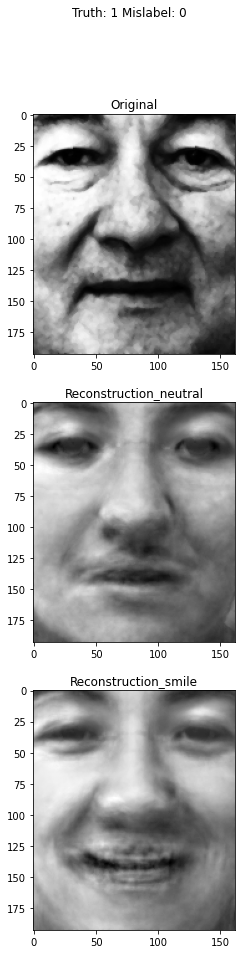

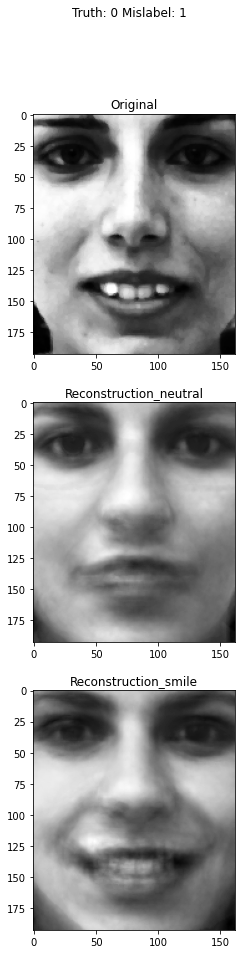

Mislabel size: 2
Done


In [599]:
for i in range(mislabel_image_set.shape[0]):
    fig, ax = plt.subplots(3,1)
    fig.suptitle("Truth: " + str(mislabel[i]) + " Mislabel: " + str(1 - mislabel[i]))
    fig.set_size_inches(5, 15)
    ax[0].imshow(mislabel_image_set[i].reshape(image_shape), cmap="gray")
    ax[0].set_title("Original")
    ax[1].imshow(mislabel_rec_neutral_set[i].reshape(image_shape), cmap="gray")
    ax[1].set_title("Reconstruction_neutral")
    ax[2].imshow(mislabel_rec_smile_set[i].reshape(image_shape), cmap="gray")
    ax[2].set_title("Reconstruction_smile")
    plt.savefig("../outputs/ans5/mislabel_" + str(i) + ".png")
    plt.show()
    plt.close()

print("Mislabel size: " + str(mislabel_image_set.shape[0]))
print("Done")

The analysis mentioned is with respect to the latest execution of the notebook. The core analysis should be the same, but as we are changing the sampling at every execution, there might be a few small variations with respect to the analysis.
#### Groundtruth: Neutral; Predicted: Smile
* The algorithm fails because values of reconstructed smiling image at the mouth matches more accurately with original image (both are darker at the center of mouth compared to other regions) compared to reconstructed neutral expression image. 
* This could mainly happen due to difference in lighting while capturing the images, which would wide range of values in the array for both expressions. One other factor which could cause error is different people have different smiling and neutral expression. 
* So, when there is visually (perceived by us) not much difference in the neutral and smiling expressions of a person, the model might also have a hard time in predicting the expression accurately (For example: the shape of lips while smiling and neutral might be same or not much difference in the smiling and neutral faces).
#### Groundtruth: Smile; Predicted: Neutral
* The algorithm fails because values of reconstructed neutral image at the mouth matches more accurately with original image (both are lighter at the center of mouth compared to other regions) compared to reconstructed smiling expression image. 
* This could mainly happen due to difference in lighting while capturing the images, which would wide range of values in the array for both expressions. One other factor which could cause error is different people have different smiling and neutral expression. 
* So, when there is visually not much difference in the neutral and smiling expressions of a person, the model might also have a hard time in predicting the expression accurately (For example: the shape of lips while smiling and neutral might be same or not much difference in the smiling and neutral faces).
#### Suggestion
* We could increase the number of Principal Components to obtain more accurate reconstructed images. Also, while collecting the dataset we could increase the variation of lighting in the trainset, so that we don't encounter such an error while testing. 
* One other variation could be including both types of faces in the training set, i.e. people whose smile and neutral face differ prominently and people whose smile and neutral face is similar.